In [1]:
!pip install pandas
!pip install seaborn
!pip install matplotlib

  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl (11.0 MB)
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/12.3 MB 9.5 MB/s eta 0:00:02
   ------------ --------------------------- 3.9/12.3 MB 10.8 MB/s eta 0:00:01
   --------------------- ------------------ 6.6/12.3 MB 11.3 MB/s eta 0:00:01
   ---------------------------- ----------- 8.9/12.3 MB 11.4 MB/s eta 0:00:01
   ----------------------------- ---------- 9.2/12.3 MB 10.3 MB/s eta 0:00:01
   ---------------------------------- ----- 10.5/12.3 MB 8.8 MB/s eta 0:00:01
   ----------------------------------- ---- 11.0/12.3 MB 8.3 MB/s eta 0:00:01
   ---------------------------------------  12.1/

In [23]:

# CLEAN & VISUAL EDA: PRICE & QUANTITY
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="white", context="talk")


# 1. LOAD DATA
df = pd.read_csv("Sales Transaction v.4a.csv")
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [25]:
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [21]:
# convert date
df["Date"] = pd.to_datetime(df["Date"])

# remove cancelled transactions 'negative quantity or price'
df = df[(df["Price"] > 0) & (df["Quantity"] > 0)].copy()


# handle missing customers
df.loc[:, "CustomerNo"] = df["CustomerNo"].fillna("Guest")

# create Total Amount.
df.loc[:, "TotalAmount"] = df["Quantity"] * df["Price"]

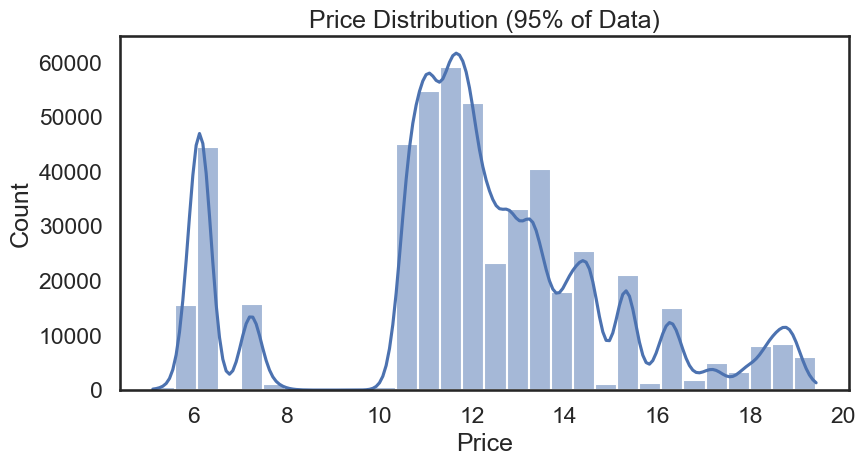

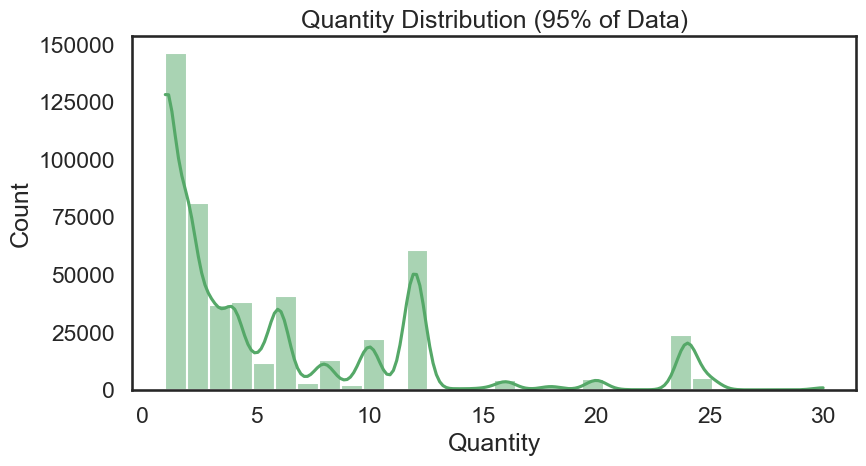

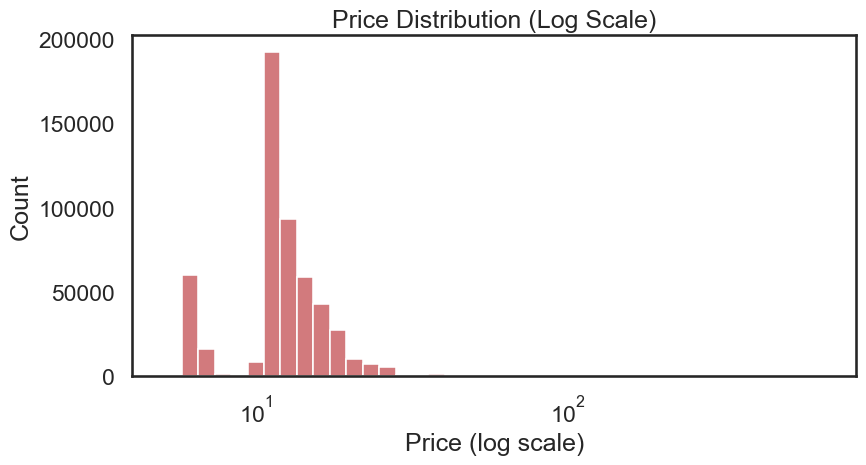

In [22]:
# 2. PRICE (VISUALIZATION)

# Cap extreme values
price_cap = df["Price"].quantile(0.95)
price_viz = df[df["Price"] <= price_cap]

plt.figure(figsize=(9,5))
sns.histplot(
    price_viz["Price"],
    bins=30,
    kde=True,
    color="#4C72B0"
)
plt.title("Price Distribution (95% of Data)")
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



# 3. QUANTITY (VISUALIZATION)

quantity_cap = df["Quantity"].quantile(0.95)
quantity_viz = df[df["Quantity"] <= quantity_cap]

plt.figure(figsize=(9,5))
sns.histplot(
    quantity_viz["Quantity"],
    bins=30,
    kde=True,
    color="#55A868"
)
plt.title("Quantity Distribution (95% of Data)")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



# 4. LOG SCALE

plt.figure(figsize=(9,5))
sns.histplot(
    df["Price"],
    bins=40,
    log_scale=True,
    color="#C44E52"
)
plt.title("Price Distribution (Log Scale)")
plt.xlabel("Price (log scale)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

